In [1]:
#importing data
import pandas as pd
df = pd.read_csv('NYPD_Arrest_Data__Year_to_Date__20250402.csv')

In [2]:
#import seaborn, numpy and matplotlib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Preliminary review of data
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260503 entries, 0 to 260502
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST_KEY                260503 non-null  int64  
 1   ARREST_DATE               260503 non-null  object 
 2   PD_CD                     260495 non-null  float64
 3   PD_DESC                   260503 non-null  object 
 4   KY_CD                     260471 non-null  float64
 5   OFNS_DESC                 260503 non-null  object 
 6   LAW_CODE                  260503 non-null  object 
 7   LAW_CAT_CD                259113 non-null  object 
 8   ARREST_BORO               260503 non-null  object 
 9   ARREST_PRECINCT           260503 non-null  int64  
 10  JURISDICTION_CODE         260503 non-null  int64  
 11  AGE_GROUP                 260503 non-null  object 
 12  PERP_SEX                  260503 non-null  object 
 13  PERP_RACE                 260503 non-null  o

In [9]:
print(df.head())

   ARREST_KEY ARREST_DATE  PD_CD            PD_DESC  KY_CD       OFNS_DESC  \
0   281369711  01/30/2024  177.0       SEXUAL ABUSE  116.0      SEX CRIMES   
1   284561406  03/30/2024  105.0  STRANGULATION 1ST  106.0  FELONY ASSAULT   
2   284896016  04/06/2024  105.0  STRANGULATION 1ST  106.0  FELONY ASSAULT   
3   285569016  04/18/2024  105.0  STRANGULATION 1ST  106.0  FELONY ASSAULT   
4   287308954  05/22/2024  464.0           JOSTLING  230.0        JOSTLING   

     LAW_CODE LAW_CAT_CD ARREST_BORO  ARREST_PRECINCT  JURISDICTION_CODE  \
0  PL 1306501          F           M               25                  0   
1  PL 1211200          F           B               44                  0   
2  PL 1211200          F           M               19                  0   
3  PL 1211200          F           K               69                  0   
4  PL 1652501          M           M               18                  0   

  AGE_GROUP PERP_SEX PERP_RACE  X_COORD_CD  Y_COORD_CD   Latitude  Longitu

In [11]:
#Data Cleaning: Dropping columns that will not be used in my analysis

drop_cols=['X_COORD_CD','Y_COORD_CD','Latitude','Longitude','New Georeferenced Column']

df.drop(drop_cols, inplace=True,axis=1)

In [13]:
#Confirmed that columns were dropped
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260503 entries, 0 to 260502
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ARREST_KEY         260503 non-null  int64  
 1   ARREST_DATE        260503 non-null  object 
 2   PD_CD              260495 non-null  float64
 3   PD_DESC            260503 non-null  object 
 4   KY_CD              260471 non-null  float64
 5   OFNS_DESC          260503 non-null  object 
 6   LAW_CODE           260503 non-null  object 
 7   LAW_CAT_CD         259113 non-null  object 
 8   ARREST_BORO        260503 non-null  object 
 9   ARREST_PRECINCT    260503 non-null  int64  
 10  JURISDICTION_CODE  260503 non-null  int64  
 11  AGE_GROUP          260503 non-null  object 
 12  PERP_SEX           260503 non-null  object 
 13  PERP_RACE          260503 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 27.8+ MB
None


In [15]:
#Descriptive Stats on Categorical Variables 

df[["ARREST_KEY", "LAW_CAT_CD"]].groupby("LAW_CAT_CD").count().sort_values('ARREST_KEY',ascending=False)

,ARREST_KEY
LAW_CAT_CD,
M,146772
F,109140
V,2233
9,734
I,226
(null),8


In [17]:
df[["ARREST_KEY", "ARREST_BORO"]].groupby("ARREST_BORO").count().sort_values('ARREST_KEY',ascending=False)

,ARREST_KEY
ARREST_BORO,
K,72325
M,61969
B,58521
Q,56633
S,11055


In [19]:
df[["ARREST_KEY", "AGE_GROUP"]].groupby("AGE_GROUP").count().sort_values('ARREST_KEY',ascending=False)

,ARREST_KEY
AGE_GROUP,
25-44,152034
45-64,51121
18-24,43174
<18,9525
65+,4649


In [21]:
df[["ARREST_KEY", "PERP_SEX"]].groupby("PERP_SEX").count().sort_values('ARREST_KEY',ascending=False)

,ARREST_KEY
PERP_SEX,
M,213587
F,46916


In [23]:
df[["ARREST_KEY", "PERP_RACE"]].groupby("PERP_RACE").count().sort_values('ARREST_KEY',ascending=False)

,ARREST_KEY
PERP_RACE,
BLACK,122049
WHITE HISPANIC,69131
BLACK HISPANIC,26549
WHITE,26161
ASIAN / PACIFIC ISLANDER,14838
UNKNOWN,956
AMERICAN INDIAN/ALASKAN NATIVE,819


In [25]:
df[["ARREST_KEY", "ARREST_PRECINCT"]].groupby("ARREST_PRECINCT").count().sort_values('ARREST_KEY',ascending=False)

,ARREST_KEY
ARREST_PRECINCT,
14,9887
75,8675
40,8389
103,7983
44,7690
...,...
123,1052
111,937
22,143


In [27]:
df[["ARREST_KEY","PD_DESC"]].groupby("PD_DESC").count().sort_values('ARREST_KEY',ascending=False)

,ARREST_KEY
PD_DESC,
ASSAULT 3,28202
"LARCENY,PETIT FROM OPEN AREAS,",27107
"ASSAULT 2,1,UNCLASSIFIED",15612
"TRAFFIC,UNCLASSIFIED MISDEMEAN",13254
"THEFT OF SERVICES, UNCLASSIFIE",12265
...,...
"CANNABIS SALE, AGGRAVATED",1
"CHECK,BAD",1
SUPP. ACT TERR 2ND,1


In [29]:
df[["ARREST_KEY","OFNS_DESC"]].groupby("OFNS_DESC").count().sort_values('ARREST_KEY',ascending=False)

,ARREST_KEY
OFNS_DESC,
ASSAULT 3 & RELATED OFFENSES,38238
PETIT LARCENY,27107
FELONY ASSAULT,22606
DANGEROUS DRUGS,18519
MISCELLANEOUS PENAL LAW,16541
VEHICLE AND TRAFFIC LAWS,13783
OTHER OFFENSES RELATED TO THEFT,12621
ROBBERY,12020
CRIMINAL MISCHIEF & RELATED OF,11854


In [31]:
#Data Cleaning: Dropping additional columns that will not be used in my analysis

drop_cols=['PD_CD','KY_CD']

df.drop(drop_cols, inplace=True,axis=1)

In [33]:
#Confirmed that two columns were dropped
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260503 entries, 0 to 260502
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ARREST_KEY         260503 non-null  int64 
 1   ARREST_DATE        260503 non-null  object
 2   PD_DESC            260503 non-null  object
 3   OFNS_DESC          260503 non-null  object
 4   LAW_CODE           260503 non-null  object
 5   LAW_CAT_CD         259113 non-null  object
 6   ARREST_BORO        260503 non-null  object
 7   ARREST_PRECINCT    260503 non-null  int64 
 8   JURISDICTION_CODE  260503 non-null  int64 
 9   AGE_GROUP          260503 non-null  object
 10  PERP_SEX           260503 non-null  object
 11  PERP_RACE          260503 non-null  object
dtypes: int64(3), object(9)
memory usage: 23.8+ MB
None


In [43]:
#Exploratory Table#1
df.groupby(["OFNS_DESC","PERP_RACE"]).size().reset_index(name='count').sort_values('count',ascending=False)

,OFNS_DESC,PERP_RACE,count
34,ASSAULT 3 & RELATED OFFENSES,BLACK,17361
294,PETIT LARCENY,BLACK,11001
38,ASSAULT 3 & RELATED OFFENSES,WHITE HISPANIC,10912
110,FELONY ASSAULT,BLACK,10747
82,DANGEROUS DRUGS,BLACK,8566
...,...,...,...
129,FORTUNE TELLING,WHITE,1
203,"LOITERING/GAMBLING (CARDS, DIC",WHITE HISPANIC,1
214,MOVING INFRACTIONS,UNKNOWN,1
101,DISRUPTION OF A RELIGIOUS SERV,BLACK HISPANIC,1


In [45]:
#Exploratory Table#2
df.groupby(["OFNS_DESC","PERP_SEX"]).size().reset_index(name='count').sort_values('count',ascending=False)

,OFNS_DESC,PERP_SEX,count
12,ASSAULT 3 & RELATED OFFENSES,M,27541
95,PETIT LARCENY,M,19988
35,FELONY ASSAULT,M,16302
26,DANGEROUS DRUGS,M,16169
67,MISCELLANEOUS PENAL LAW,M,14092
...,...,...,...
4,ADMINISTRATIVE CODES,M,2
64,LOITERING,M,2
32,ESCAPE 3,F,2
40,FORTUNE TELLING,F,1


In [47]:
df1=df["OFNS_DESC"].isin(["ASSAULT 3 & RELATED OFFENSES","PETIT LARCENY","FELONY ASSAULT"])

In [49]:
df[df1]

,ARREST_KEY,ARREST_DATE,PD_DESC,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE
1,284561406,03/30/2024,STRANGULATION 1ST,FELONY ASSAULT,PL 1211200,F,B,44,0,25-44,M,BLACK
2,284896016,04/06/2024,STRANGULATION 1ST,FELONY ASSAULT,PL 1211200,F,M,19,0,25-44,M,BLACK
3,285569016,04/18/2024,STRANGULATION 1ST,FELONY ASSAULT,PL 1211200,F,K,69,0,25-44,M,BLACK
9,288408753,06/12/2024,STRANGULATION 1ST,FELONY ASSAULT,PL 1211200,F,B,52,0,45-64,M,BLACK
13,288638726,06/17/2024,STRANGULATION 1ST,FELONY ASSAULT,PL 1211200,F,K,75,0,25-44,M,BLACK
...,...,...,...,...,...,...,...,...,...,...,...,...
260492,298550810,12/27/2024,"LARCENY,PETIT FROM OPEN AREAS,",PETIT LARCENY,PL 1552500,M,K,75,0,45-64,M,BLACK
260493,298408181,12/23/2024,ASSAULT POLICE/PEACE OFFICER,FELONY ASSAULT,PL 1200800,F,M,19,0,45-64,F,WHITE
260494,298193885,12/18/2024,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,102,0,45-64,M,BLACK
260495,298472501,12/26/2024,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,101,0,<18,M,BLACK


In [75]:
#Table#1: Top 3 Offense Descriptions by Gender
df[df1].groupby(["OFNS_DESC","PERP_SEX"]).size().reset_index(name='count').sort_values('count',ascending=False)

,OFNS_DESC,PERP_SEX,count
1,ASSAULT 3 & RELATED OFFENSES,M,27541
5,PETIT LARCENY,M,19988
3,FELONY ASSAULT,M,16302
0,ASSAULT 3 & RELATED OFFENSES,F,10697
4,PETIT LARCENY,F,7119
2,FELONY ASSAULT,F,6304


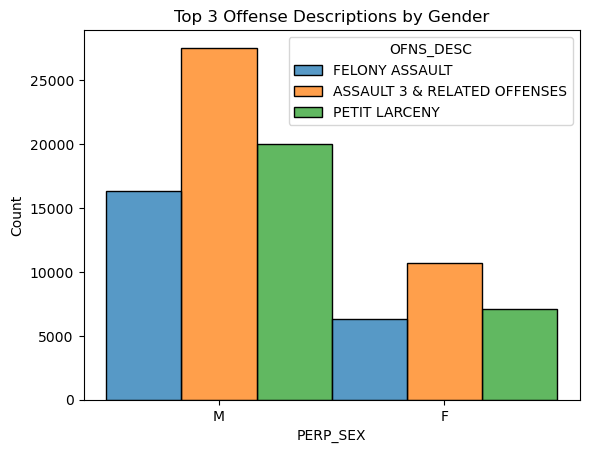

In [53]:
#Graph#1: Top 3 Offense Descriptions by Gender

sns.histplot(binwidth=1,
            x="PERP_SEX",
            hue="OFNS_DESC",
            data=df[df1],
            stat="count",
            multiple="dodge").set_title("Top 3 Offense Descriptions by Gender")

plt.show()

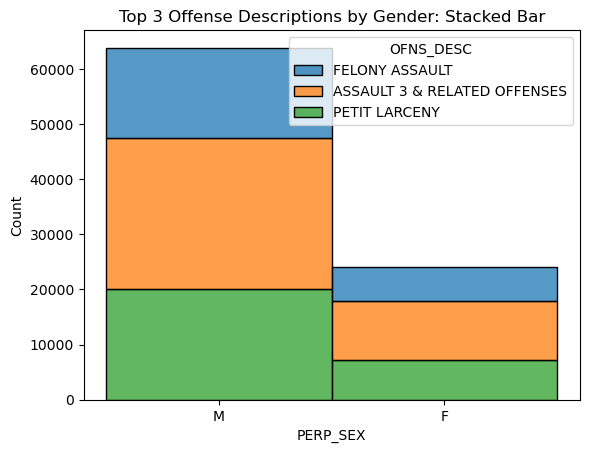

In [55]:
#Graph#2: Top 3 Offense Descriptions by Gender: Stacked Bar

sns.histplot(binwidth=0.5, x="PERP_SEX", hue="OFNS_DESC", data=df[df1], stat="count", multiple="stack").set_title("Top 3 Offense Descriptions by Gender: Stacked Bar")
plt.show()

In [57]:
df2=df["OFNS_DESC"].isin(["ASSAULT 3 & RELATED OFFENSES"])

In [59]:
df[df2]

,ARREST_KEY,ARREST_DATE,PD_DESC,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE
21,282350930,02/17/2024,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,25,0,18-24,F,WHITE HISPANIC
76,298572175,12/28/2024,OBSTR BREATH/CIRCUL,ASSAULT 3 & RELATED OFFENSES,PL 1211100,M,Q,116,0,18-24,M,BLACK
89,283242467,03/05/2024,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,K,67,0,25-44,F,BLACK
90,280390400,01/12/2024,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,112,0,25-44,M,WHITE
97,281637084,02/04/2024,"MENACING,UNCLASSIFIED",ASSAULT 3 & RELATED OFFENSES,PL 1201401,M,B,52,0,25-44,M,WHITE HISPANIC
...,...,...,...,...,...,...,...,...,...,...,...,...
260479,298521305,12/27/2024,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,42,0,25-44,M,BLACK
260482,298694790,12/31/2024,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,17,0,25-44,M,BLACK
260484,298252109,12/19/2024,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,20,0,25-44,M,BLACK
260494,298193885,12/18/2024,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,102,0,45-64,M,BLACK


In [63]:
#Table#2: Top Offense Description by Race
df[df2].groupby(["OFNS_DESC","PERP_RACE"]).size().reset_index(name='count').sort_values('count',ascending=False)

,OFNS_DESC,PERP_RACE,count
2,ASSAULT 3 & RELATED OFFENSES,BLACK,17361
6,ASSAULT 3 & RELATED OFFENSES,WHITE HISPANIC,10912
3,ASSAULT 3 & RELATED OFFENSES,BLACK HISPANIC,3604
5,ASSAULT 3 & RELATED OFFENSES,WHITE,3317
1,ASSAULT 3 & RELATED OFFENSES,ASIAN / PACIFIC ISLANDER,2722
0,ASSAULT 3 & RELATED OFFENSES,AMERICAN INDIAN/ALASKAN NATIVE,199
4,ASSAULT 3 & RELATED OFFENSES,UNKNOWN,123


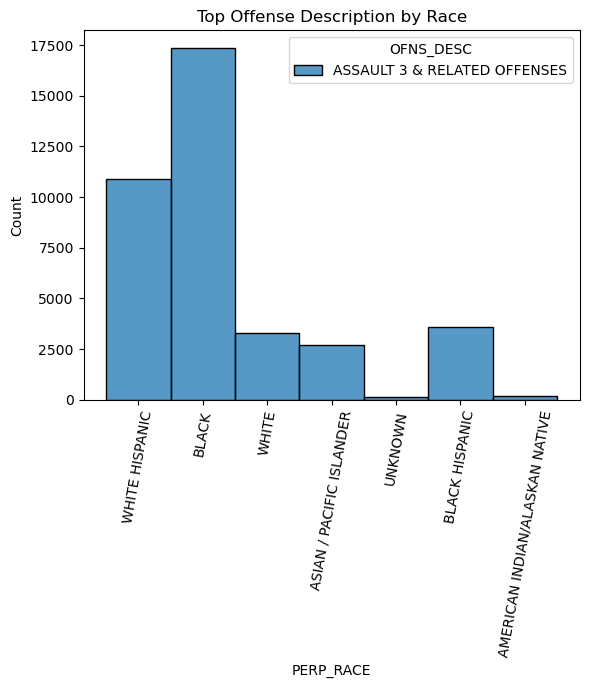

In [65]:
#Graph#3: Top Offense Description by Race

sns.histplot(binwidth=1,
            x="PERP_RACE",
            hue="OFNS_DESC",
            data=df[df2],
            stat="count",
            multiple="dodge").set_title("Top Offense Description by Race")
plt.xticks(rotation=80)

plt.show()

In [ ]:
#Summmary: For my analysis, I focused on two comparisons: (1) Top 3 Offense Descriptions by Gender and, (2) Top Offense Description by Race. Regarding the first comparison, among the top 3 offense descriptions, males (n=63,831) committed more offenses than females (n=24,120). For the second comparison, among those arrested for "Assult 3 and Related Offenses," the race with the highest number of arrestees was Black (n=17,361), followed by White Hispanic (10912), and then Black Hispanic (n=3604). To complete this analysis several steps were taken including an exploratory analysis of data and data cleaning which included removing unnecessary columns. Results should be interpreted with caution, as there is a potential for bias in this dataset. For example, racial profiling could have had an impact on how often minorities were arrested, and as a result appear in this dataset.  